In [9]:
import tensorflow as tf
tf.keras.backend.set_learning_phase(1)
from PIL import Image
from keras import backend as K 
import matplotlib.pyplot as plt

from src import pre_process
from src import models


c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


All .tiff images are stained with `Martius Scarlet Blue (MSB) stain`. The two major acute ischemic stroke (AIS) etiology subtypes and their main cellular differences are:

1. **Cardio Embolism (CE):** RBCs=47.67%, WBCs=4.22%, F= 29.19%, P=18.21%

2. **Artery Atherosclerosis (AA):** RBCs=42.58%, WBCs=3.12%, F=31.31%, P=20.81%


<font size="1,5"> [Abbasi M, Fitzgerald S, Ayers-Ringler J, Espina V, Mueller C, Rucker S, Kadirvel R, Kallmes D, Brinjikji W. Proteomic Analysis of Cardioembolic and Large Artery Atherosclerotic Clots Using Reverse Phase Protein Array Technology Reveals Key Cellular Interactions Within Clot Microenvironments. Cureus. 2021 Feb 22;13(2):e13499. doi: 10.7759/cureus.13499. PMID: 33777584; PMCID: PMC7990677.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7990677/)</font>

Given this insight, we can maintain the distinct colors in the images since each cellular subtype is stained differently. Rather than preserving every pixel, we can reduce their size to enhance the efficiency of the neural network (NN) processing.

![CE](/images/CEexample1.png)

In [10]:
folder_path = "data/CE"
Image.MAX_IMAGE_PIXELS = 3000000000 
# pre_process.display_tiff_images(folder_path)


In [11]:
train_data_path = "data/train/"
test_data_path = "data/test/"

K.set_learning_phase(1)
img_width, img_height = 150,150 
nb_train_samples = 2  
nb_validation_samples = 4  
epochs = 2  #Number of times the algorithm is learning
batch_size = 3  #Number of training examples used in each iteration
n_classes = 2 

In [12]:
train_data_path = "data/train/"
test_data_path = "data/test/"

train_generator, test_generator = pre_process.image_generator1(train_data_path, test_data_path, img_width, img_height, batch_size)

Found 5 images belonging to 2 classes.
Found 4 validated image filenames belonging to 1 classes.


`DenseNet model:`

In [13]:
epochs = 2  
trained_model = pre_process.get_weights(train_generator, test_generator, img_width, img_height, epochs)

Epoch 1/2


2/2 [==============================] - 128s 117s/step - loss: 2.5223 - accuracy: 0.5000 - val_loss: 1.1953 - val_accuracy: 0.0000e+00
Epoch 2/2
2/2 [==============================] - 86s 77s/step - loss: 0.7369 - accuracy: 0.5000 - val_loss: 0.5891 - val_accuracy: 1.0000


In [14]:
n_classes = 2
model = models.densenet_model()  

29084464/29084464 [==============================] - 2s 0us/step


In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc", "mse"])  

In [16]:
#EarlyStopping if the training does not improve with epochs, then: will STOP
#ReduceLROnPlateau, the same as above but in specific epochs.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  


early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)  
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)  
callbacks_list = [early_stop, reduce_lr]  

In [17]:
DenseNet = model.fit_generator(train_generator,
                                epochs=epochs,
                                validation_data=test_generator,
                                validation_steps=nb_validation_samples // batch_size,
                                callbacks=callbacks_list)

C:\Users\saraa\AppData\Local\Temp\ipykernel_9312\686850279.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  DenseNet = model.fit_generator(train_generator,


Epoch 1/2
2/2 [==============================] - 143s 73s/step - loss: 454.6360 - acc: 0.6000 - mse: 0.3586 - val_loss: 441.7206 - val_acc: 1.0000 - val_mse: 0.3906 - lr: 0.0010
Epoch 2/2
2/2 [==============================] - 65s 58s/step - loss: 426.7370 - acc: 0.6000 - mse: 0.2484 - val_loss: 424.5444 - val_acc: 1.0000 - val_mse: 0.4544 - lr: 0.0010


dict_keys(['loss', 'acc', 'mse', 'val_loss', 'val_acc', 'val_mse', 'lr'])


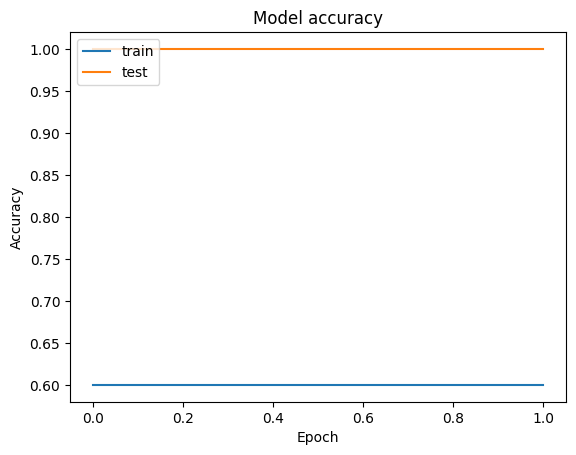

In [18]:
print(DenseNet.history.keys())
plt.plot(DenseNet.history['acc'])
plt.plot(DenseNet.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 1s/step


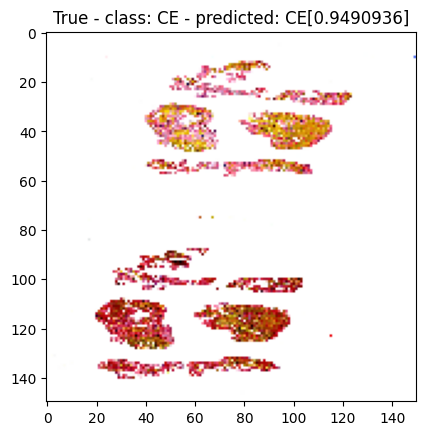

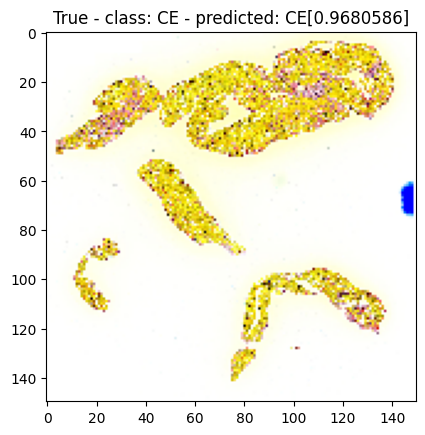

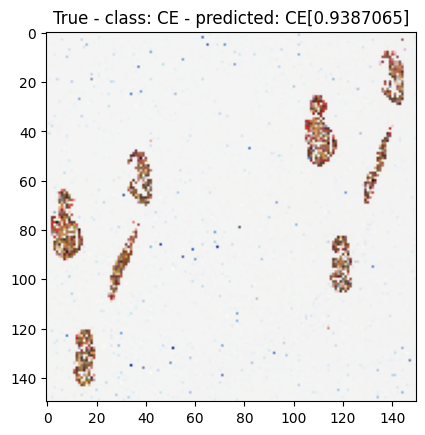

In [19]:
class_names = ["CE", "LAA"]
 
models.predict_densenet(model, test_generator, class_names)  

`EfficientNet model:`

In [21]:
from efficientnet.tfkeras import EfficientNetB6


NUM_CLASSES = 2

model = EfficientNetB6(include_top=True, weights=None, classes=NUM_CLASSES,
    input_shape=(150, 150, 3),)
    
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

epochs = 2  # @param {type: "slider", min:10, max:100}
EfficientNet = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Model: "efficientnet-b6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 75, 75, 56)           1512      ['input_2[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 75, 75, 56)           224       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 75, 75, 56)           0         ['stem_bn[0][0]'

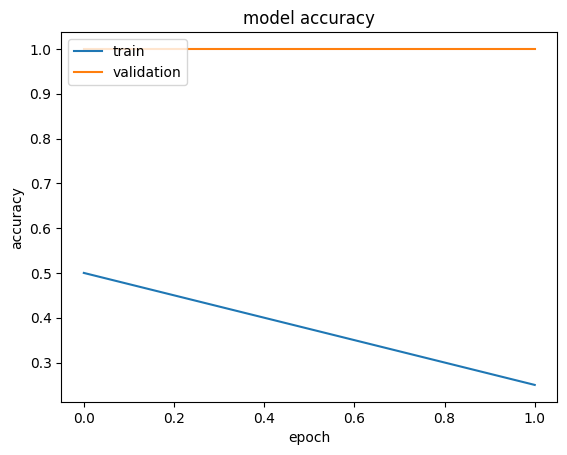

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(EfficientNet)